In [1]:
import mesa_reader as mr
import pandas as pd
import numpy as np
import pdb
import matplotlib.pyplot as plt
import h5py as h5
from matplotlib.patches import Patch
from scipy.optimize import curve_fit
from scipy.optimize import curve_fit
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
})


solar_mass = [8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]#,26,27,28,29,30]
rsol = 6.96e10 #cm
msol = 1.989e33 #grams
lsol = 3.839e33 #ergs
G = 6.67259e-8 #grav constant CGS
z  = 0.0014 #metalicity #solar 0.014

In [2]:
def find_index(array, target):
    closest_index = None
    min_difference = float('inf')  # Set initial minimum difference to infinity

    for i, value in enumerate(array):
        difference = abs(value - target)
        if difference < min_difference:
            min_difference = difference
            closest_index = i

    return closest_index


def quad(x, a, b ,c):
    return a*x**2 + b*x + c

def linear(xdata, m, b):
    return m*xdata + b

def sqrt(x,a,c):
    return a*np.sqrt(x) + c

2Z/
[3990.5385440020623, 3956.74460800764, 3923.549848507817, 3912.2448773706374, 3893.477231353376, 3887.398581703478, 3892.1501123186486, 3899.271436696459, 3915.5450263287253, 3945.2295001511848, 3992.085700198946, 4055.2384155405107, 4124.555640728898, 4273.909750050865, 4489.813735775464]
std = 164.0080110080787


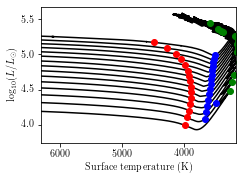

1Z/
[4292.375729794357, 4235.8201374116325, 4206.602145202411, 4184.514589649687, 4154.069762385954, 4138.272595297112, 4121.529678586852, 4115.908534201654, 4112.1586445836965, 4106.138268701315, 4106.397052002961, 4112.089269771416, 4139.600100034079, 4163.055311502101, 4206.604549058399]
std = 53.49798518027339


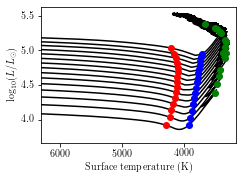

01Z/
[4469.624297836722, 4463.474046902741, 4450.583745360736, 4443.4792856671365, 4451.125603670884, 4469.01119959688, 4468.714747786957, 4459.221556055884, 4461.404935275266, 4405.380567440552, 4404.257997752846, 4404.123483565454, 4400.518786326587, 4412.037110482894, 4413.82605111813]
std = 26.985560666887288


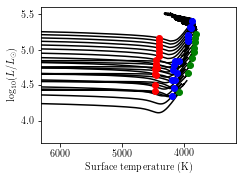

001Z/
[4533.65536709256, 4511.969246957592, 4509.128617469657, 4516.380174447647, 4514.270063663375, 4507.971130079838, 4508.183160914506, 4497.69236178349, 4445.884925334571, 4450.074630392807, 4465.206172493737, 4466.237060633309, 4489.863322476303, 4518.220108900675, 4557.028979690043]
std = 29.912193872234297


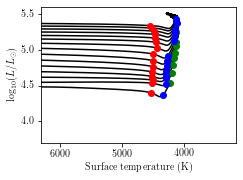

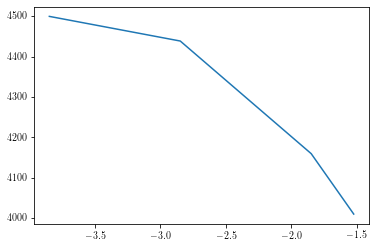

In [3]:
z_dir = ['2Z/','1Z/','01Z/','001Z/']
solar_mass = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]#,26,27,28,29,30]
Z = ['2','1','01','001']
metalicity = [0.03,0.0142, 0.00142, 0.000142]


legend_handles = [
    plt.Line2D([0], [0], marker="_",color='black', label='HR evolution', markersize=8),
    plt.Line2D([0], [0], marker='o', color='red', label='1%', markersize=8),
    plt.Line2D([0], [0], marker='o', color='blue', label='50%', markersize=8),
    plt.Line2D([0], [0], marker='o', color='green', label='99%', markersize=8)]

Tonset_z = []
for k,z in enumerate(z_dir):
    print(z)
    Tonset_m = []
    plt.figure(figsize=(3.5, 2.5))
    for j in solar_mass:
        h = mr.MesaData('/home/lewis/Documents/Honours_Research/data/LOGS/Recombination/' + z + str(j) + 'M/history.data') #use the path to your data files
        
        M_conv = []
        log_Teff = []
        log_L = []
        R_conv_base = []
        for i in range(len(h.M_conv_env)):
            if (h.log_LH[i] > 1):
                M_conv.append(h.M_conv_env[i])
                log_Teff.append(h.log_Teff[i])
                log_L.append(h.log_L[i])
                R_conv_base.append(h.R_conv_base[i])

        M_star = j
        M_conv_max = np.max(M_conv)

        idx_0 = find_index(M_conv, 0.01*M_conv_max)

        idx_1 = find_index(M_conv, 0.5*M_conv_max)

        idx_2 = find_index(M_conv, 0.99*M_conv_max )

        log_L = np.array(log_L)
        log_Teff = np.array(log_Teff)

        plt.plot(10**log_Teff,log_L,label = 'HR evolution', c = 'black',zorder = 1)
        plt.scatter(10**log_Teff[idx_0],log_L[idx_0], c = 'r',zorder = 2)
        plt.scatter(10**log_Teff[idx_1],log_L[idx_1], c = 'b',zorder = 2)
        plt.scatter(10**log_Teff[idx_2],log_L[idx_2], c ='g',zorder = 2)
        Tonset_m.append(10**log_Teff[idx_0])
        
    Tonset_z.append(np.mean(Tonset_m)) 
    print(Tonset_m)
    print('std =', np.std(Tonset_m))
    plt.gca().invert_xaxis()
    plt.xlim(10**3.8,10**3.5)
    plt.xlabel('Surface temperature (K) ') 
    plt.ylabel('$\log_{10}(L/L_\odot)$ ')
#     legend = plt.legend(handles=legend_handles, loc='upper left', fontsize='small')
    plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Plots_for_paper/Mixinglengths/' + Z[k] +'Z_conv_on_hr.pdf', bbox_inches = 'tight')
    plt.show()
plt.plot(np.log10(metalicity), Tonset_z)
plt.show()
names = ['Tonset_z']
table = [Tonset_z]
df = pd.DataFrame(table)
df = df.T            
df.to_csv('/home/lewis/Documents/Honours_Research/data/csv/metalicity_fit/Tonset_z_mean.csv', index=True, header=names, sep=',')
    

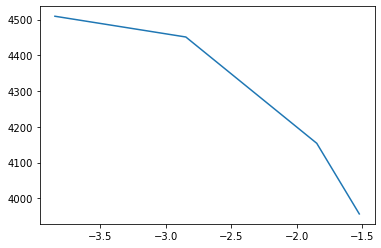

In [79]:
plt.plot(log_m,data.Tonset_z)

[-139.74806418 -981.65773255 2798.28182726]


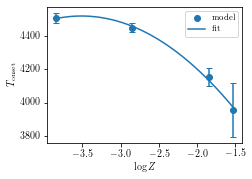

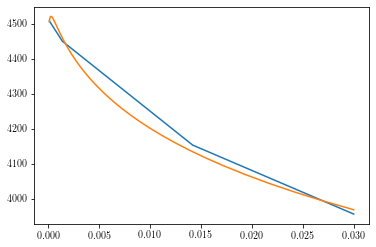

In [3]:
metalicity = [0.03,0.0142,0.00142,0.000142]
std = [164,53,27, 29]
log_m = np.log10(metalicity)
data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/metalicity_fit/Tonset_z.csv')
domain = np.linspace(log_m[0],log_m[-1],50)
popt1, pcov = curve_fit(quad, log_m,data.Tonset_z)
print(popt1)
plt.figure(figsize = (3.5, 2.5))
plt.scatter(log_m, data.Tonset_z, label = 'model')
plt.errorbar(log_m, data.Tonset_z, yerr = std, fmt = 'none', capsize = 3)
plt.plot(domain,quad(domain,*popt1), label = 'fit')
plt.ylabel('$T_\mathrm{onset}$')
plt.xlabel('$\log{Z}$')
plt.legend(fontsize = 'small')
plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Plots_for_paper/metalicity/Tonset_fit.pdf', bbox_inches = 'tight')
plt.show()

plt.plot(metalicity, data.Tonset_z)
plt.plot(np.power(10,domain),quad(domain,*popt1))

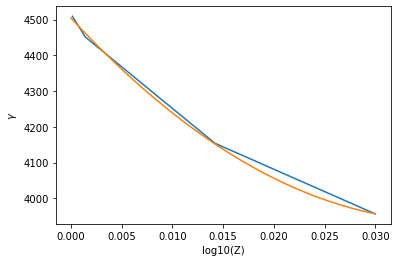

3957.1080074613283 4152.343718209176 4461.621960979289 4499.994904884345
[414397.65349748 -30673.06683825   4504.34212446]


In [98]:
metalicity = [0.03,0.0142,0.00142,0.000142]
data = pd.read_csv(r'/home/lewis/Documents/Honours_Research/data/csv/metalicity_fit/Tonset_z.csv')
domain = np.linspace(0,0.03,50)
popt1, pcov = curve_fit(quad, metalicity,data.Tonset_z)
plt.plot(metalicity, data.Tonset_z)
plt.plot(domain,quad(domain,*popt1))
plt.xlabel('log10(Z)')
plt.ylabel('$\gamma$')
plt.show()

print(quad(0.03,*popt1),quad(0.0142,*popt1),quad(0.00142,*popt1),quad(0.000142,*popt1))
print(popt1)

In [60]:
np.sqrt(-5)

/home/lewis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


nan

04


/home/lewis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


08
12
16
20


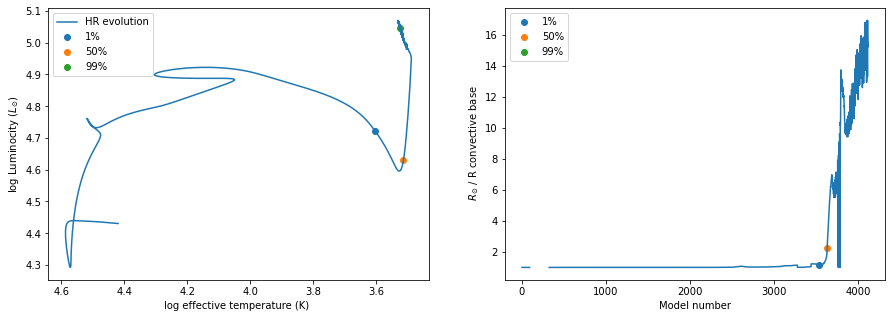

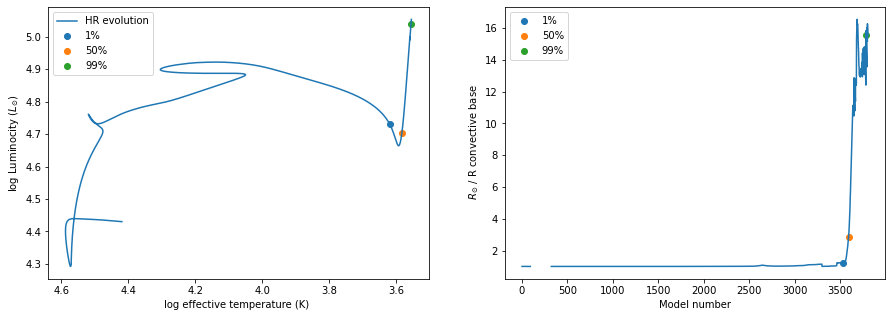

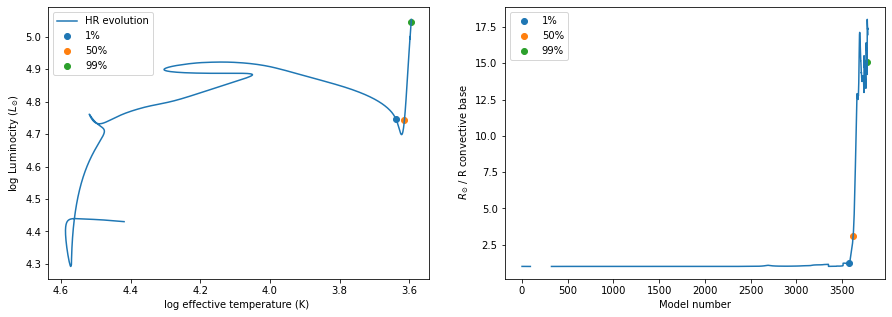

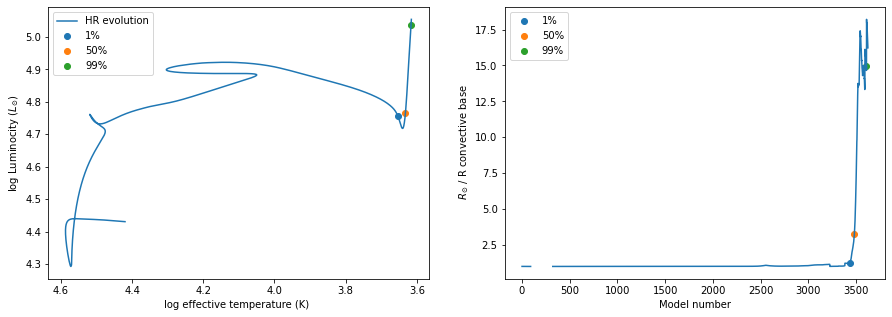

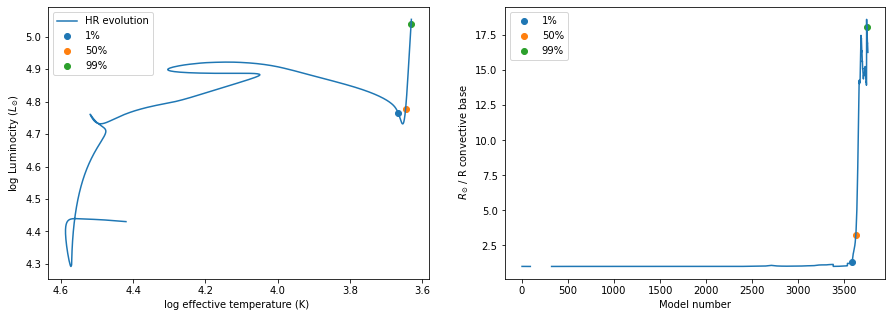

In [29]:
ml_list = ['04','08','12','16','20']#

#for a 15 solar mass with 1% Zsun 

for ml in ml_list:
    print(ml)
    h = mr.MesaData('/home/lewis/Documents/Honours_Research/data/LOGS/Mixing_length/'+ ml +'/history.data')
    
    M_conv = []
    log_Teff = []
    log_L = []
    R_conv_base = []
    r_cm = []
    for i in range(len(h.M_conv_env)):
        if (h.log_LH[i] > 1):
            M_conv.append(h.M_conv_env[i])
            log_Teff.append(h.log_Teff[i])
            log_L.append(h.log_L[i])
            R_conv_base.append(h.R_conv_base[i])
            r_cm.append(h.radius_cm[i])
    
    r_cm = np.array(r_cm)
    R_conv_base = np.array(R_conv_base)
    r_on_conv = r_cm/R_conv_base
    
    M_conv_max = np.max(M_conv)
    
    idx_0 = find_index(M_conv, 0.01*M_conv_max)
    idx_1 = find_index(M_conv, 0.5*M_conv_max)
    idx_2 = find_index(M_conv, 0.99*M_conv_max )
    
    fig, axs = plt.subplots(1, 2,figsize=(15, 5))
    axs[0].plot(log_Teff,log_L,label = 'HR evolution')
    axs[0].scatter(log_Teff[idx_0],log_L[idx_0], label = '1%')
    axs[0].scatter(log_Teff[idx_1],log_L[idx_1], label = "50%")
    axs[0].scatter(log_Teff[idx_2],log_L[idx_2], label = '99%')
    axs[0].invert_xaxis()
    axs[0].legend()
    axs[0].set_xlabel('log effective temperature (K) ') 
    axs[0].set_ylabel('log Luminocity ($L_{\odot}$) ')
    
    
    x_axis = list(range(len(r_cm)))
    axs[1].plot(x_axis,r_on_conv)
    axs[1].scatter(x_axis[idx_0],r_on_conv[idx_0], label = '1%')
    axs[1].scatter(x_axis[idx_1],r_on_conv[idx_1], label = "50%")
    axs[1].scatter(x_axis[idx_2],r_on_conv[idx_2], label = '99%')
    axs[1].legend()
    axs[1].set_xlabel('Model number') 
    axs[1].set_ylabel(' $R_{\odot}$ / R convective base ')
#     plt.title('15$M_{\odot}$, 001$Z_{\odot}$ ml' + ml) 
#     plt.show()
plt.show()
    

04
0.00016757105353104595


/home/lewis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


08
0.00016757105353104595
12
0.0001675710535310737
16
0.00016757105353104595
20
0.00016757105353104595
Z = 0.000142, M_i = 16


/home/lewis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


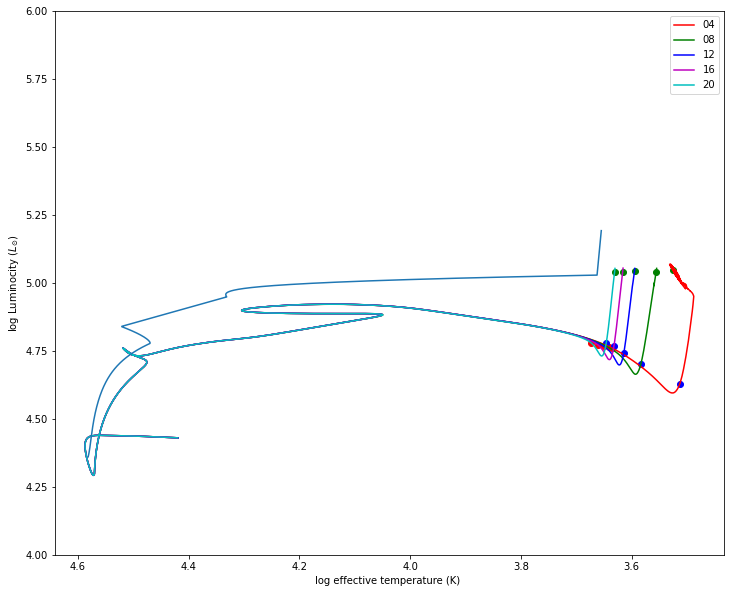

In [5]:
ml_list = ['04','08','12','16','20']#
colour = ['r','g','b','m','c']
plt.figure(figsize = (12,10))
for k,ml in enumerate(ml_list):
    print(ml)
    h = mr.MesaData('/home/lewis/Documents/Honours_Research/data/LOGS/Mixing_length/'+ ml +'/history.data')
    z = 1 - h.center_h1[0] - h.center_he4[0]
    print(z)
    M_conv = []
    log_Teff = []
    log_L = []
    R_conv_base = []
    r_cm = []
    for i in range(len(h.M_conv_env)):
        if (h.log_LH[i] > 1):
            M_conv.append(h.M_conv_env[i])
            log_Teff.append(h.log_Teff[i])
            log_L.append(h.log_L[i])
            R_conv_base.append(h.R_conv_base[i])
            r_cm.append(h.radius_cm[i])
    
    r_cm = np.array(r_cm)
    R_conv_base = np.array(R_conv_base)
    r_on_conv = r_cm/R_conv_base
    
    M_conv_max = np.max(M_conv)
    
    idx_0 = find_index(M_conv, 0.005*M_conv_max)
    idx_1 = find_index(M_conv, 0.5*M_conv_max)
    idx_2 = find_index(M_conv, 0.99*M_conv_max )
    
#     plt.figure(figsize=(15, 10)) 
#     fig, axs = plt.subplots(1, 2,figsize=(15, 5))
    plt.plot(log_Teff,log_L,label = ml, c = colour[k])
    plt.scatter(log_Teff[idx_0],log_L[idx_0], c ='r')
    plt.scatter(log_Teff[idx_1],log_L[idx_1], c = 'b')
    plt.scatter(log_Teff[idx_2],log_L[idx_2], c = 'g')
    
#     plt.legend()
    plt.xlabel('log effective temperature (K) ') 
    plt.ylabel('log Luminocity ($L_{\odot}$) ')
    

pathToOutput = '/home/lewis/Documents/Honours_Research/COMPAS-dev/utils/preProcessing/COMPAS_Output/Detailed_Output/'
pathToh5 = pathToOutput + 'SSE_Detailed_Output_' + '27' + '.h5'
Data = h5.File(pathToh5)  
L = Data['Luminosity'][()]
Teff = Data['Teff'][()]
St = Data['Stellar_Type'][()]

#get values of interest
z = Data['Metallicity@ZAMS'][()][0]
M_i = round(Data['Mass'][()][0])

print(f'Z = {z}, M_i = {M_i}')

plt.plot(np.log10(Teff[:-2]), np.log10(L[:-2]))

plt.gca().invert_xaxis()
plt.ylim(4,6)
plt.legend()
plt.show()
    

Z_Mesa = 2Z/, M_i_MESA = 8.0
Z_compas = 0.03, M_i_compass = 8


/home/lewis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


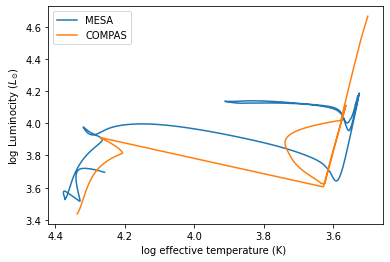

Z_Mesa = 2Z/, M_i_MESA = 12.0
Z_compas = 0.03, M_i_compass = 12


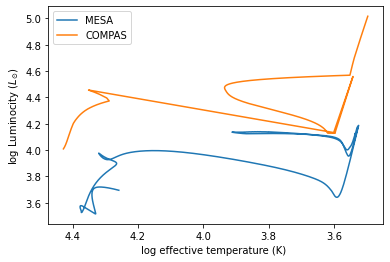

Z_Mesa = 2Z/, M_i_MESA = 16.0
Z_compas = 0.03, M_i_compass = 16


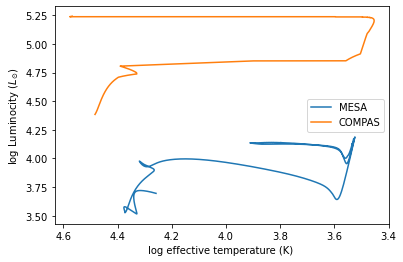

Z_Mesa = 2Z/, M_i_MESA = 20.0
Z_compas = 0.03, M_i_compass = 20


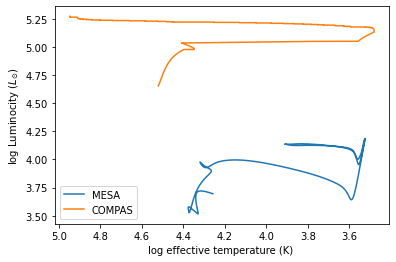

Z_Mesa = 2Z/, M_i_MESA = 24.0
Z_compas = 0.03, M_i_compass = 24


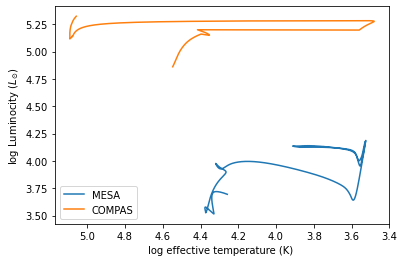

Z_Mesa = 2Z/, M_i_MESA = 28.0
Z_compas = 0.03, M_i_compass = 28


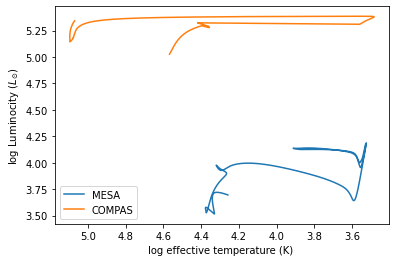

Z_Mesa = 1Z/, M_i_MESA = 8.0
Z_compas = 0.0142, M_i_compass = 8


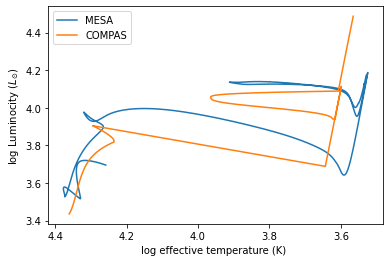

Z_Mesa = 1Z/, M_i_MESA = 12.0
Z_compas = 0.0142, M_i_compass = 12


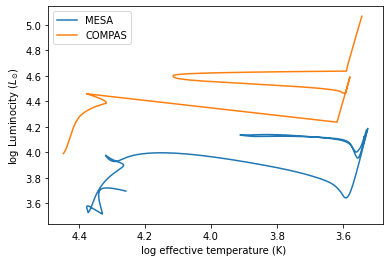

Z_Mesa = 1Z/, M_i_MESA = 16.0
Z_compas = 0.0142, M_i_compass = 16


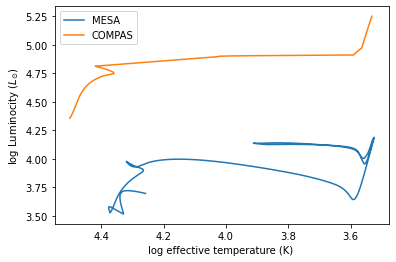

Z_Mesa = 1Z/, M_i_MESA = 20.0
Z_compas = 0.0142, M_i_compass = 20


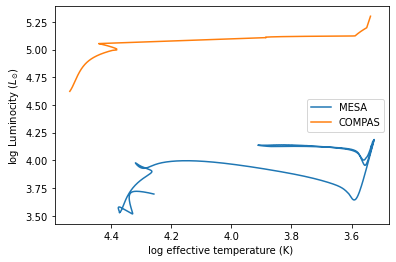

Z_Mesa = 1Z/, M_i_MESA = 24.0
Z_compas = 0.0142, M_i_compass = 24


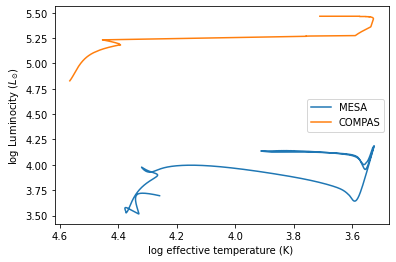

Z_Mesa = 1Z/, M_i_MESA = 28.0
Z_compas = 0.0142, M_i_compass = 28


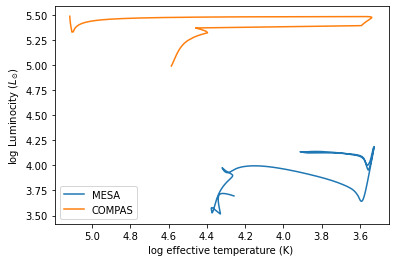

Z_Mesa = 01Z/, M_i_MESA = 8.0
Z_compas = 0.00142, M_i_compass = 8


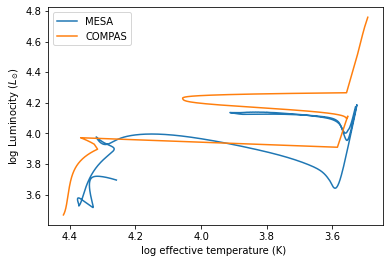

Z_Mesa = 01Z/, M_i_MESA = 12.0
Z_compas = 0.00142, M_i_compass = 12


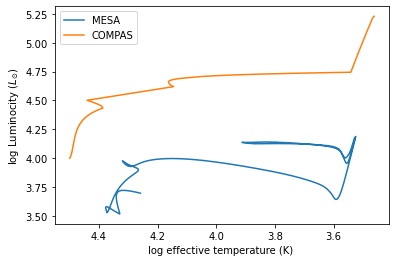

Z_Mesa = 01Z/, M_i_MESA = 16.0
Z_compas = 0.00142, M_i_compass = 16


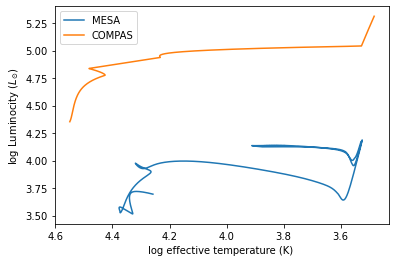

Z_Mesa = 01Z/, M_i_MESA = 20.0
Z_compas = 0.00142, M_i_compass = 20


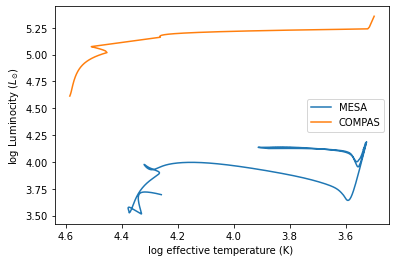

Z_Mesa = 01Z/, M_i_MESA = 24.0
Z_compas = 0.00142, M_i_compass = 24


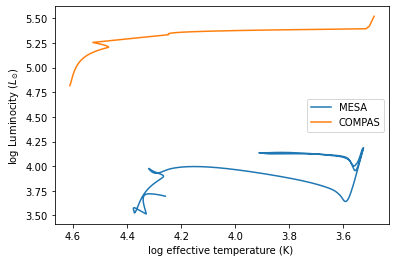

Z_Mesa = 01Z/, M_i_MESA = 28.0
Z_compas = 0.00142, M_i_compass = 28


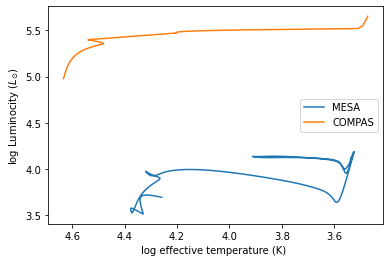

Z_Mesa = 001Z/, M_i_MESA = 8.0
Z_compas = 0.000142, M_i_compass = 8


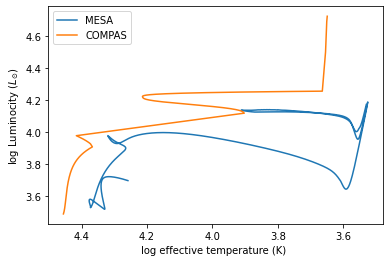

Z_Mesa = 001Z/, M_i_MESA = 12.0
Z_compas = 0.000142, M_i_compass = 12


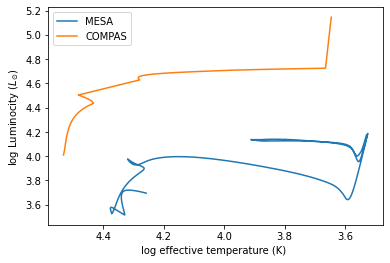

Z_Mesa = 001Z/, M_i_MESA = 16.0
Z_compas = 0.000142, M_i_compass = 16


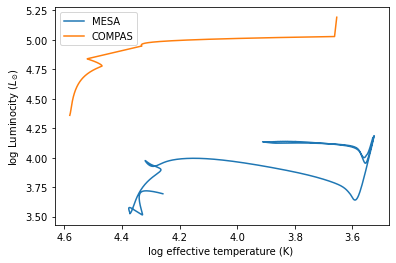

Z_Mesa = 001Z/, M_i_MESA = 20.0
Z_compas = 0.000142, M_i_compass = 20


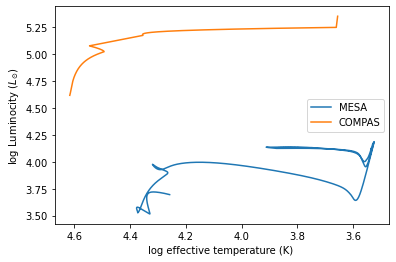

Z_Mesa = 001Z/, M_i_MESA = 24.0
Z_compas = 0.000142, M_i_compass = 24


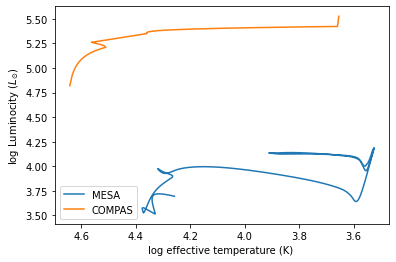

Z_Mesa = 001Z/, M_i_MESA = 28.0
Z_compas = 0.000142, M_i_compass = 28


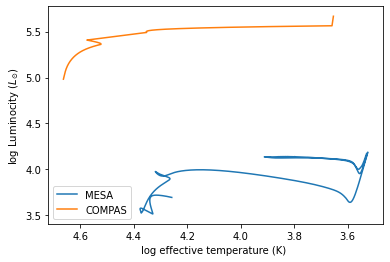

In [31]:
z_dir = ['2Z/','1Z/','01Z/','001Z/']
star_mass = ['8','12','16','20','24','28']

for z in z_dir: 
    for mass in star_mass:
        

        #plot MESA
        Data = mr.MesaData('/home/lewis/Documents/Honours_Research/data/LOGS/TMP/' + z + mass +'M/history.data')
        log_Teff = []
        log_L = []
        for i in range(len(h.M_conv_env)):
            if (h.log_LH[i] > 1):
                log_Teff.append(h.log_Teff[i])
                log_L.append(h.log_L[i])

        plt.plot(log_Teff, log_L, label = 'MESA')
        
        
        
        M_i = Data.star_mass[0]

        print(f'Z_Mesa = {z}, M_i_MESA = {M_i}')
        #plot hr diagram
        
        #plot COMPAS
        pathToh5 = '/home/lewis/Documents/Honours_Research/data/LOGS/TMP/' + z + mass + 'M/SSE_Detailed_Output.h5'

        Data = h5.File(pathToh5)  
        L = Data['Luminosity'][()]
        Teff = Data['Teff'][()]
        St = Data['Stellar_Type'][()]

        #get values of interest
        metalicity = Data['Metallicity@ZAMS'][()][0]
        M_i = round(Data['Mass'][()][0])

        print(f'Z_compas = {metalicity}, M_i_compass = {M_i}')
        #plot hr diagram
        tmp = []
        for val in St:
            if val not in tmp:
                tmp.append(val)

        idx_start = min(np.where(St == 1)[0])
        idx_end = max(np.where(St == tmp[-2])[0]) 

        plt.plot(np.log10(Teff[idx_start:idx_end]), np.log10(L[idx_start:idx_end]),label = 'COMPAS')
        
        plt.xlabel('log effective temperature (K) ') 
        plt.ylabel('log Luminocity ($L_{\odot}$) ')
        plt.gca().invert_xaxis()
        plt.legend()
        plt.show()

        

Z_compas = 0.03, M_i_compass = 8
Tmin = 3161.6293118780313
Luminosity =  46687.51448060454
Z_compas = 0.03, M_i_compass = 12
Tmin = 3131.9521277381177
Luminosity =  105046.48187954514
Z_compas = 0.03, M_i_compass = 16
Tmin = 2842.3707599443032
Luminosity =  159205.4824116811
Z_compas = 0.03, M_i_compass = 20
Tmin = 3028.092910910487
Luminosity =  139638.27241452326
Z_compas = 0.03, M_i_compass = 24
Tmin = 3021.5987167587614
Luminosity =  189214.20853304895
Z_compas = 0.03, M_i_compass = 28
Tmin = 3043.1041373293697
Luminosity =  239635.03186823547


/home/lewis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  if __name__ == '__main__':


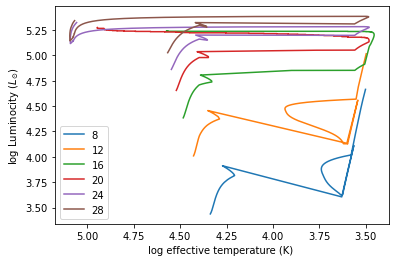

Z_compas = 0.0142, M_i_compass = 8
Tmin = 3672.0105343036275
Luminosity =  31088.008558335034
Z_compas = 0.0142, M_i_compass = 12
Tmin = 3484.323231938508
Luminosity =  118710.8501199787
Z_compas = 0.0142, M_i_compass = 16
Tmin = 3401.5401825707795
Luminosity =  180068.96794117824
Z_compas = 0.0142, M_i_compass = 20
Tmin = 3437.8241445391222
Luminosity =  202389.74355555626
Z_compas = 0.0142, M_i_compass = 24
Tmin = 3366.3697031720044
Luminosity =  274143.06906018435
Z_compas = 0.0142, M_i_compass = 28
Tmin = 3444.703391562818
Luminosity =  300138.99195908237


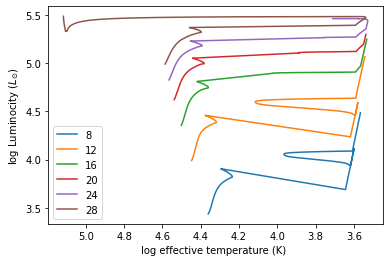

Z_compas = 0.00142, M_i_compass = 8
Tmin = 3098.5582077895965
Luminosity =  57845.134106398065
Z_compas = 0.00142, M_i_compass = 12
Tmin = 2889.677225984685
Luminosity =  170862.1979367612
Z_compas = 0.00142, M_i_compass = 16
Tmin = 3037.1343228674773
Luminosity =  206355.36187397255
Z_compas = 0.00142, M_i_compass = 20
Tmin = 3141.509280555453
Luminosity =  229127.27141453733
Z_compas = 0.00142, M_i_compass = 24
Tmin = 2588.541657650893
Luminosity =  1e-10
Z_compas = 0.00142, M_i_compass = 28
Tmin = 2205.6128424756384
Luminosity =  1e-10


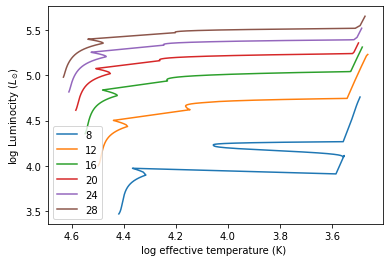

Z_compas = 0.000142, M_i_compass = 8
Tmin = 4451.293192067038
Luminosity =  53734.14288045174
Z_compas = 0.000142, M_i_compass = 12
Tmin = 4418.7425959702805
Luminosity =  141345.45018251392
Z_compas = 0.000142, M_i_compass = 16
Tmin = 4511.884390241117
Luminosity =  157821.61339055313
Z_compas = 0.000142, M_i_compass = 20
Tmin = 3033.7824512143634
Luminosity =  1e-10
Z_compas = 0.000142, M_i_compass = 24
Tmin = 2389.4669639234676
Luminosity =  1e-10
Z_compas = 0.000142, M_i_compass = 28
Tmin = 1953.8799367559407
Luminosity =  1e-10


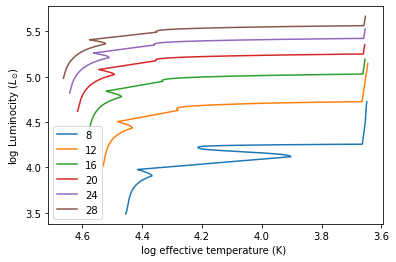

In [26]:
z_dir = ['2Z/','1Z/','01Z/','001Z/']
star_mass = ['8','12','16','20','24','28']

for z in z_dir: 
    for mass in star_mass:
        #plot COMPAS
        pathToh5 = '/home/lewis/Documents/Honours_Research/data/LOGS/TMP/' + z + mass + 'M/SSE_Detailed_Output.h5'

        Data = h5.File(pathToh5)  
        L = Data['Luminosity'][()]
        Teff = Data['Teff'][()]
        St = Data['Stellar_Type'][()]

        #get values of interest
        metalicity = Data['Metallicity@ZAMS'][()][0]
        M_i = round(Data['Mass'][()][0])

        print(f'Z_compas = {metalicity}, M_i_compass = {M_i}')
        #plot hr diagram
        tmp = []
        for val in St:
            if val not in tmp:
                tmp.append(val)

        idx_start = min(np.where(St == 1)[0])
        idx_end = max(np.where(St == tmp[-2])[0]) 
        print('Tmin =', min(Teff))
        idx_tmp = find_index(Teff,min(Teff))
        print('Luminosity = ', L[idx_tmp])
        
        plt.plot(np.log10(Teff[idx_start:idx_end]), np.log10(L[idx_start:idx_end]),label = mass)
        
    plt.xlabel('log effective temperature (K) ') 
    plt.ylabel('log Luminocity ($L_{\odot}$) ')
    plt.gca().invert_xaxis()
    plt.legend()
    plt.show()


04
0.00016757105353104595
14.999999999999673
73541215203506.83
ratio_0.1= 1.197091700930701
08


/home/lewis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide


0.00016757105353104595
14.999999999999403
60632307294825.28
ratio_0.1= 1.7655791844941566
12
0.0001675710535310737
14.999999999999345
50576772719690.734
ratio_0.1= 1.6288761012392525
16
0.00016757105353104595
14.99999999999932
45902251045150.88
ratio_0.1= 1.577207965118978
20
0.00016757105353104595
14.99999999999929
42876258299090.77
ratio_0.1= 1.701212840457359


<Figure size 720x576 with 0 Axes>

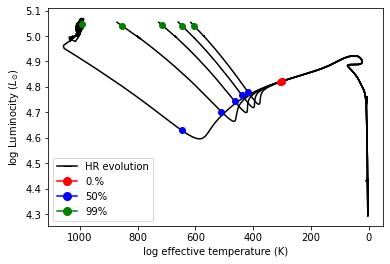

In [36]:
ml_list = ['04','08','12','16','20']#
plt.figure(figsize = (10,8))
fig, ax = plt.subplots()
# plt.figure(figsize = (10,8))
for ml in ml_list:
    print(ml)
    h = mr.MesaData('/home/lewis/Documents/Honours_Research/data/LOGS/Mixing_length/'+ ml +'/history.data')
    z = 1 - h.center_h1[0] - h.center_he4[0]
    print(z)
    print(h.star_mass[0])
    M_conv = []
    log_Teff = []
    log_L = []
    R_conv_base = []
    r_cm = []
    for i in range(len(h.M_conv_env)):
        if (h.log_LH[i] > 1):
            M_conv.append(h.M_conv_env[i])
            log_Teff.append(h.log_Teff[i])
            log_L.append(h.log_L[i])
            R_conv_base.append(h.R_conv_base[i])
            r_cm.append(h.radius_cm[i])
    
    r_cm = np.array(r_cm)
    R_conv_base = np.array(R_conv_base)
    r_on_conv = r_cm/R_conv_base
    rmax = max(r_cm)
    M_conv_max = np.max(M_conv)
    
    idx_0 = find_index(M_conv, 0.001*M_conv_max)
    idx_tmp = find_index(M_conv, 0.01*M_conv_max)
    idx_1 = find_index(M_conv, 0.5*M_conv_max)
    idx_2 = find_index(M_conv, 0.99*M_conv_max)
    idx_tmp = find_index(log_Teff, tmin)
    tmin = min(log_Teff)
    print(rmax)
#     print(10**tmin)
#     print('luminosity at tmin=', 10**log_L[idx_tmp])
    ax.plot(r_cm/rsol, log_L, label=ml, c='black',zorder =1)
    ax.scatter(r_cm[idx_0]/rsol, log_L[idx_0], c='red', marker='o',zorder =3)
    ax.scatter(r_cm[idx_1]/rsol, log_L[idx_1], c='blue', marker='o',zorder =2)
    ax.scatter(r_cm[idx_2]/rsol, log_L[idx_2], c='green', marker='o',zorder =2)
#     ax.scatter(10**log_Teff[idx_tmp], log_L[idx_tmp], c='m', marker='o',zorder =2)
    print('ratio_0.1=',(rmax- r_cm[idx_1])/(r_cm[idx_1] - r_cm[idx_0]))
#     print('ratio_1=',(10**log_Teff[idx_1] - 10**tmin)/(10**log_Teff[idx_tmp] - 10**log_Teff[idx_1]))
plt.xlabel('log effective temperature (K)')
plt.ylabel('log Luminocity ($L_{\\odot}$)')

legend_handles = [
    plt.Line2D([0], [0], marker="_", color='black', label='HR evolution', markersize=8),
    plt.Line2D([0], [0], marker='o', color='red', label='0.%', markersize=8),
    plt.Line2D([0], [0], marker='o', color='blue', label='50%', markersize=8),
    plt.Line2D([0], [0], marker='o', color='green', label='99%', markersize=8)]
plt.legend()
plt.legend(handles=legend_handles)
plt.gca().invert_xaxis()
# plt.xlim(7500, 3000)
plt.savefig('/home/lewis/Documents/Honours_Research/data/plots/Plots_for_paper/Mixinglengths/mixing_lengths.pdf')
plt.show()
    

In [ ]:
h = mr.MesaData('/home/lewis/Documents/Honours_Research/data/LOGS/Mixing_length/20/history.data')